## Bibliotecas

In [ ]:
%reset -f # clean Jupyter Variables

from tabulate import tabulate

import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

## (a) Expectância e variância teóricas

In [19]:
def theoreticalMoments(normal, uniforme, exponential, binomial):
    """"
    Calculate the theoretical expected value and variance for variables with distributions indicated by the parameters.
    
    Parameters:
        • normal: (tuple of float). Normal distribution. Q ∼ N(μ, σ²).
        • uniforme: (tuple of float). Uniforme distribution. X ~ U[a, b].
        • exponential: (tuple of float). Exponential distribution. Y ~ E(λ).
        • binomial: (tuple of float). Binomial distribution. T ~ B(N, p).
    
    Returns:
        • "theoreticalDict": (dict) Table with theoretical expected values (μ) and variances (σ²) for each variable.
    """

    meanQ, varQ = normal # Q ∼ N(μ, σ²)

    # X ~ U[a, b]
    a, b = uniforme
    meanX = (a + b)/2
    varX = ((b - a)**2)/12

    # Y ~ E(λ)
    λ = exponential
    meamY = 1/λ
    varY = 1/(λ**2)

    # T ~ B(N, p)
    N, p = binomial
    meanT = N*p
    varT = N*p*(1 - p)

    return {
        "Expected value (μ)": {"Q": meanQ, "X": meanX, "Y": meamY, "T": meanT},
        "Variance (σ²)":      {"Q":  varQ, "X":  varX, "Y":  varY, "T":  varT},
    }

theoreticalDict = theoreticalMoments(normal=(1, 2),
                                     uniforme=(-3, 3),
                                     exponential=(0.1),
                                     binomial=(20, 0.2))

theoreticalDF = pd.DataFrame(theoreticalDict)
theoreticalTable = tabulate(theoreticalDF,
    headers="keys",
    tablefmt="fancy_grid",
    numalign="right",
    stralign="center"
)

print("Table 2: Theoretical expected values (μ) and variances (σ²) for each variable.")
print(theoreticalTable)

Table 2: Theoretical expected values (μ) and variances (σ²) for each variable.
╒════╤══════════════════════╤═════════════════╕
│    │   Expected value (μ) │   Variance (σ²) │
╞════╪══════════════════════╪═════════════════╡
│ Q  │                    1 │               2 │
├────┼──────────────────────┼─────────────────┤
│ X  │                    0 │               3 │
├────┼──────────────────────┼─────────────────┤
│ Y  │                   10 │             100 │
├────┼──────────────────────┼─────────────────┤
│ T  │                    4 │             3.2 │
╘════╧══════════════════════╧═════════════════╛


## (b) Estimativas para a média e a variância

In [20]:
def readData(filepath):
    """
    Function to read data files.

    Parameters:
        • filepath: (str). Path to the data file.
    
    Returns:
        • "samples": (list of float). Samples structured in a list.
    """

    with open(filepath, "r") as r:
        samples = [float(line.strip()) for line in r]

    return samples

samplesQ = readData("data/data1q.dat")
samplesX = readData("data/data1x.dat")
samplesY = readData("data/data1y.dat")
samplesT = readData("data/data1t.dat")

def empericalMoments(samples):
    """
    Calculate the emperical expected value and variance of samples.

    Parameters:
        • samples: (list of float). Samples structured in a list.

    Returns:
        • mean (float): emperical mean.  μ = 1/n ∑ W_i.
        • var (float): emperical variance. σ² = 1/(n-1) ∑ (W_i - μ)²
    """

    n = len(samples)

    sumMean = 0
    for i in range(n): sumMean += samples[i]
    mean = sumMean/n

    sumVar = 0
    for i in range(n): sumVar += (samples[i] - mean)**2
    var = sumVar/(n - 1)

    return mean, var

empericalQ = empericalMoments(samplesQ)
empericalX = empericalMoments(samplesX)
empericalY = empericalMoments(samplesY)
empericalT = empericalMoments(samplesT)

empericalDict = {
    "Expected value (μ)": {"Q": empericalQ[0], "X": empericalX[0], "Y": empericalY[0], "T": empericalT[0]},
    "Variance (σ²)":      {"Q": empericalQ[1], "X": empericalX[1], "Y": empericalY[1], "T": empericalT[1]},
}

empericalDF = pd.DataFrame(empericalDict)
empericalTable = tabulate(empericalDF,
    headers="keys",
    tablefmt="fancy_grid",
    numalign="right",
    stralign="center"
)

print("Table 3: Emperical expected values (μ) and variances (σ²) for each variable.")
print(empericalTable)

Table 3: Emperical expected values (μ) and variances (σ²) for each variable.
╒════╤══════════════════════╤═════════════════╕
│    │   Expected value (μ) │   Variance (σ²) │
╞════╪══════════════════════╪═════════════════╡
│ Q  │             0.999538 │         2.00302 │
├────┼──────────────────────┼─────────────────┤
│ X  │          -0.00217247 │         3.00119 │
├────┼──────────────────────┼─────────────────┤
│ Y  │              9.98906 │         99.5663 │
├────┼──────────────────────┼─────────────────┤
│ T  │              4.00196 │         3.20481 │
╘════╧══════════════════════╧═════════════════╛


## (c) Análise de histogramas

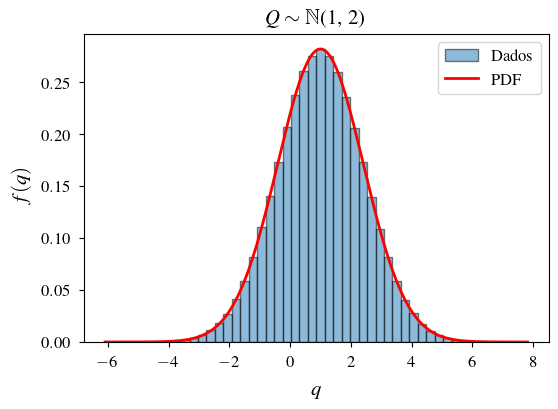

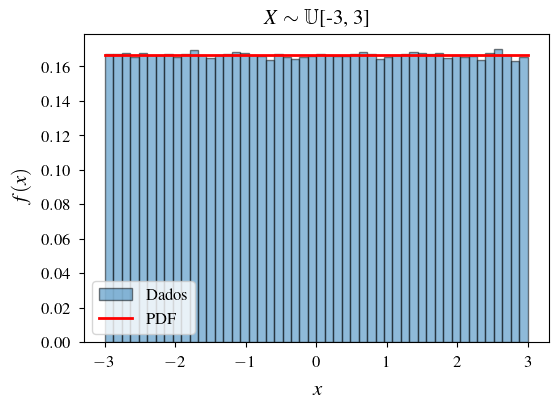

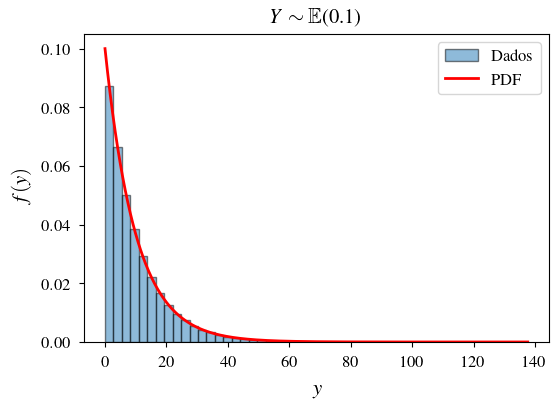

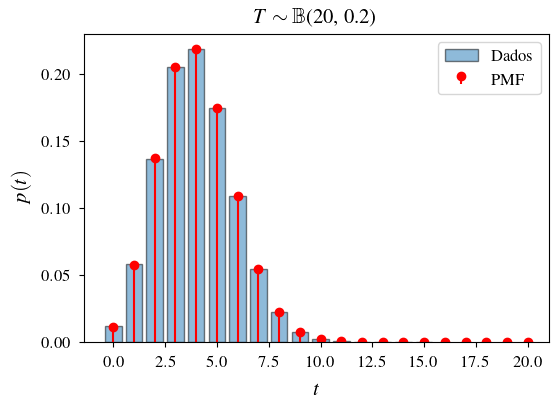

In [56]:
def plotHistogram(normal, uniforme, exponential, binomial, bins=50):
    """"
    Plot of the histograms for each distribution and their respective random variables.

    Parameters:
        • normal: (tuple of tuple of float and list of float). Normal distribution and samples. Q ∼ N(μ, σ²).
        • uniforme: (tuple of tuple of float and list of float). Uniforme distribution and samples. X ~ U[a, b].
        • exponential: (tuple of tuple of float and list of float). Exponential distribution and samples. Y ~ E(λ).
        • binomial: (tuple of tuple of float and list of float). Binomial distribution and samples. T ~ B(N, p).
    """

    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times"],
        "text.latex.preamble": r'\usepackage{amsfonts}',
        "text.usetex": True
    })
    px = 1/plt.rcParams["figure.dpi"]

    if normal: # Q ∼ N(μ, σ²)
        (meanQ, varQ), samplesQ = normal
        x = np.linspace(min(samplesQ), max(samplesQ), 1000)
        pdfNormal = 1/(np.sqrt(2*np.pi*varQ))*np.exp(-((x - meanQ)**2)/(2*varQ))

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        ax.hist(samplesQ, bins=bins, density=True, alpha=0.5, edgecolor="black", label="Dados")
        ax.plot(x, pdfNormal, "r-", linewidth=2, label="PDF")

        ax.set_xlabel(r'$q$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$f(q)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(r'$Q \sim \mathbb{N}$' + f"({meanQ}, {varQ})", pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig("figures/normal.pdf", bbox_inches="tight", pad_inches=0)

    if uniforme: # X ~ U[a, b]
        (a, b), samplesX = uniforme
        x = np.linspace(min(samplesX), max(samplesX), 1000)
        pdfUniforme = np.where((x >= a) & (x <= b), 1/(b - a), 0)

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        ax.hist(samplesX, bins=bins, density=True, alpha=0.5, edgecolor="black", label="Dados")
        ax.plot(x, pdfUniforme, "r-", linewidth=2, label="PDF")

        ax.set_xlabel(r'$x$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$f(x)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(r'$X \sim \mathbb{U}$' + f"[{a}, {b}]", pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig("figures/uniforme.pdf", bbox_inches="tight", pad_inches=0)

    if exponential: # Y ~ E(λ)
        λ, samplesY = exponential
        x = np.linspace(min(samplesY), max(samplesY), 1000)
        pdfExponential = λ*np.exp(-λ*x)*(x >= 0)

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        ax.hist(samplesY, bins=bins, density=True, alpha=0.5, edgecolor="black", label="Dados")
        ax.plot(x, pdfExponential, "r-", linewidth=2, label="PDF")

        ax.set_xlabel(r'$y$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$f(y)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(r'$Y \sim \mathbb{E}$' + f"({λ})", pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig("figures/exponential.pdf", bbox_inches="tight", pad_inches=0)

    if binomial: # T ~ B(N, p)
        (N, p), samplesT = binomial
        x = np.arange(0, N+1)
        pmf = np.array([math.comb(N, xi)*(p**xi)*(1 - p)**(N - xi) for xi in x])
        unique, counts = np.unique(samplesT, return_counts=True)

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        plt.bar(unique, counts/len(samplesT), alpha=0.5, edgecolor='black', label="Dados")
        plt.stem(x, pmf, "r", markerfmt="ro", basefmt=" ", label="PMF")

        ax.set_xlabel(r'$t$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$p(t)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(r'$T \sim \mathbb{B}$' + f"({N}, {p})", pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig("figures/binomial.pdf", bbox_inches="tight", pad_inches=0)

plotHistogram(normal=((1, 2), samplesQ),
              uniforme=((-3, 3), samplesX),
              exponential=((0.1), samplesY),
              binomial=((20, 0.2), samplesT))

## (d) e (e) Amostragem

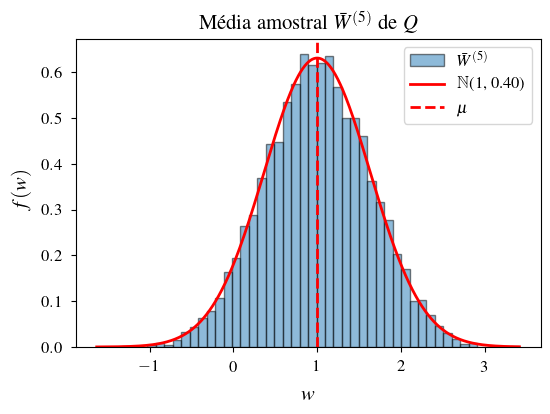

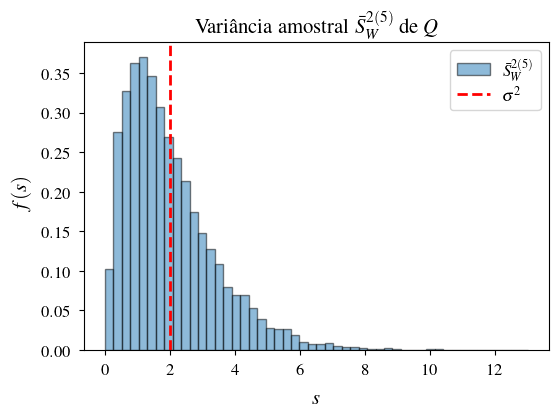

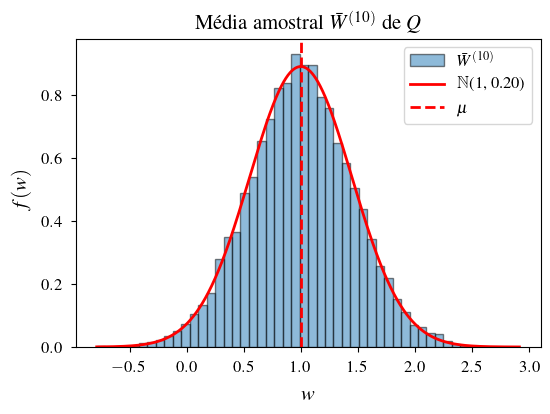

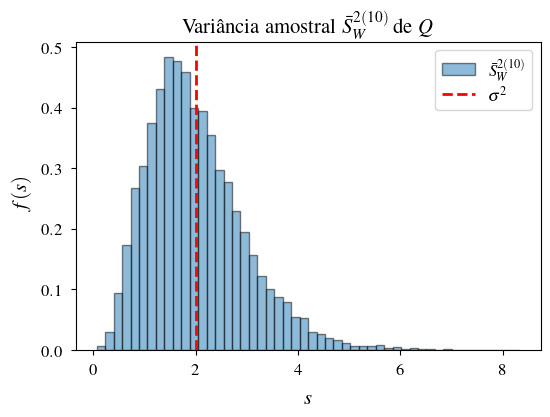

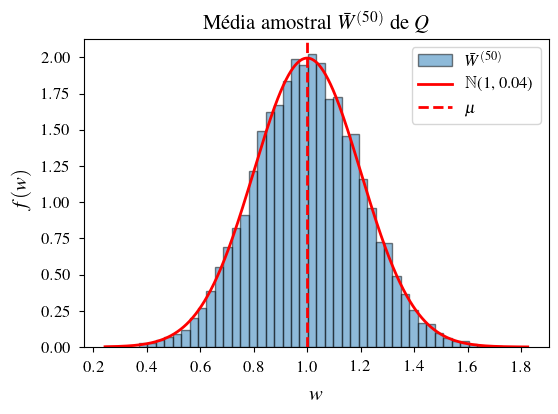

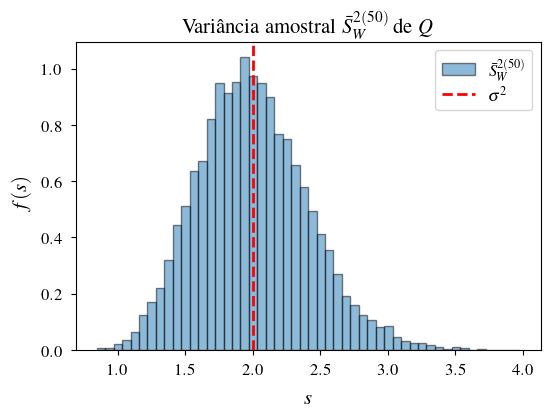

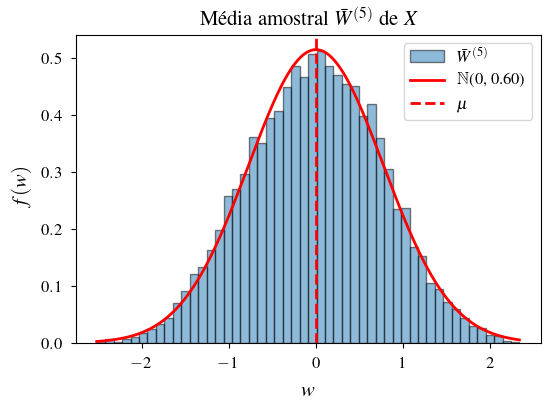

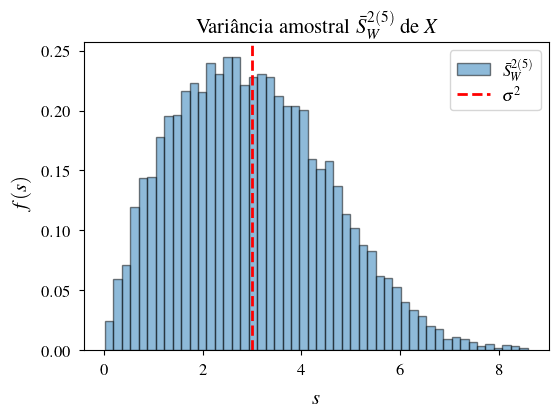

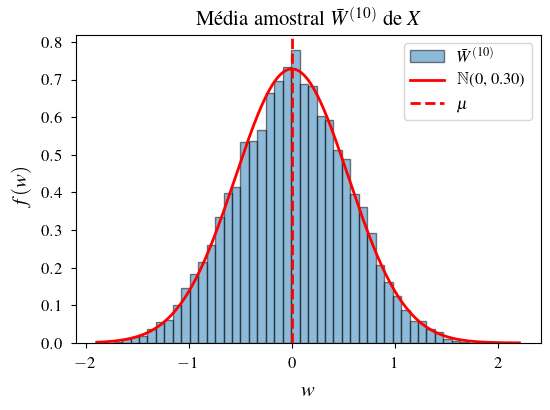

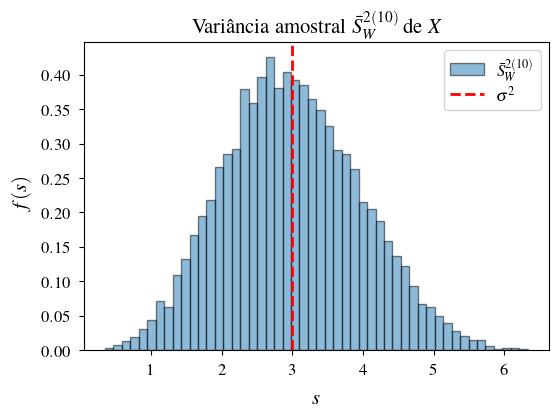

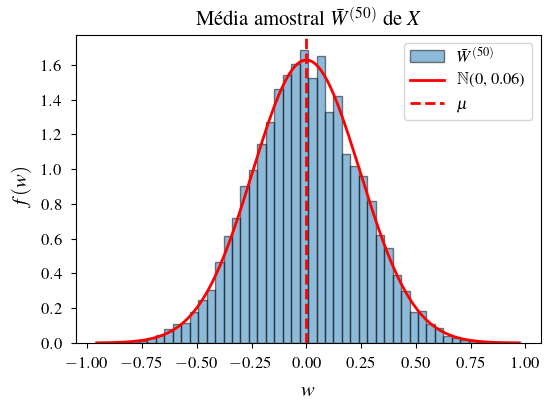

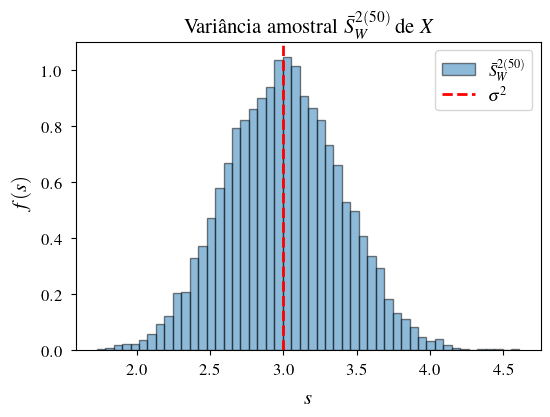

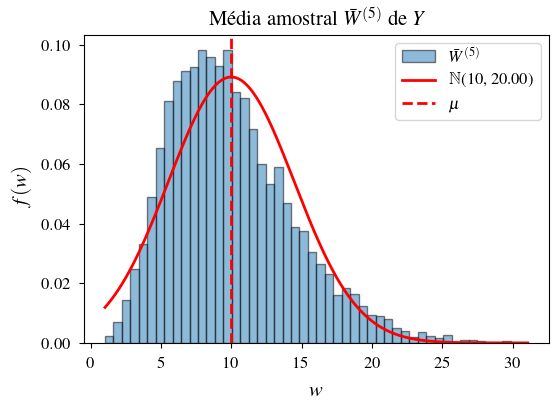

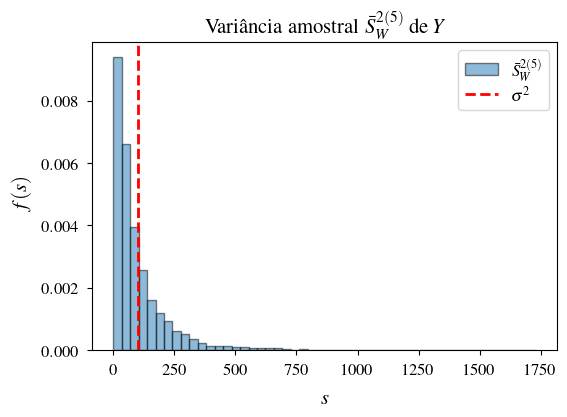

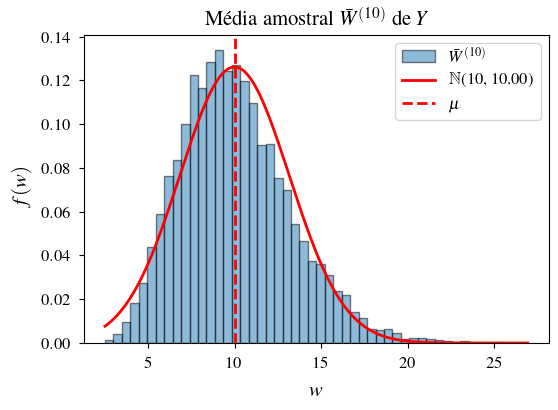

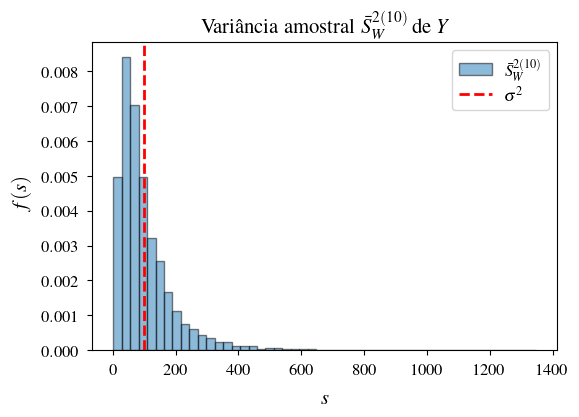

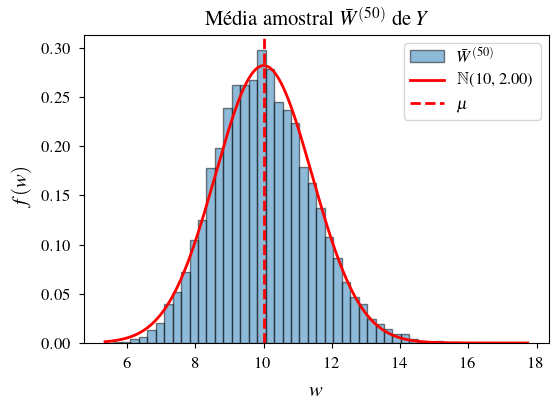

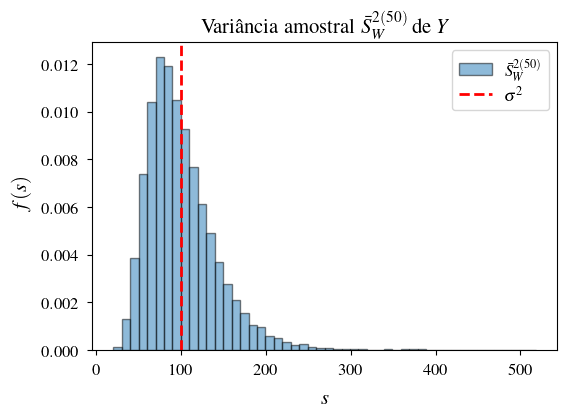

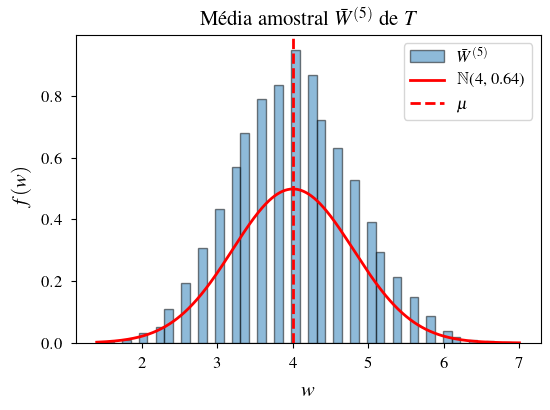

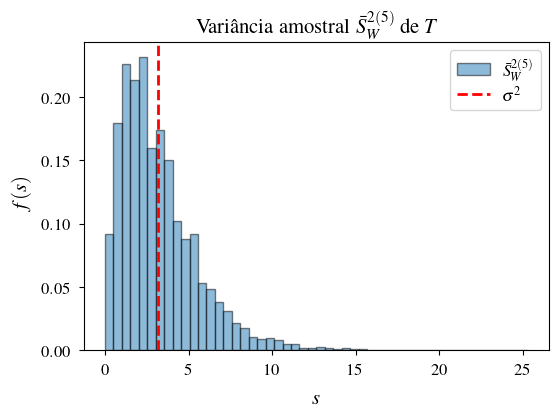

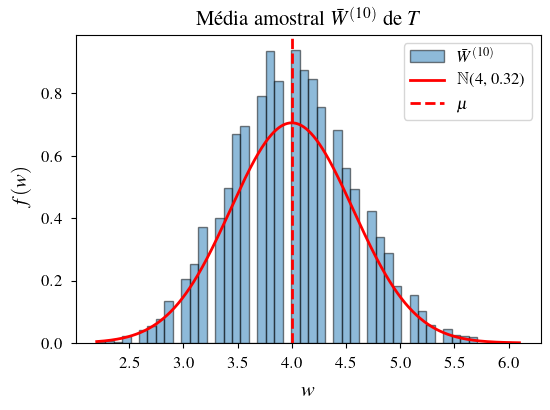

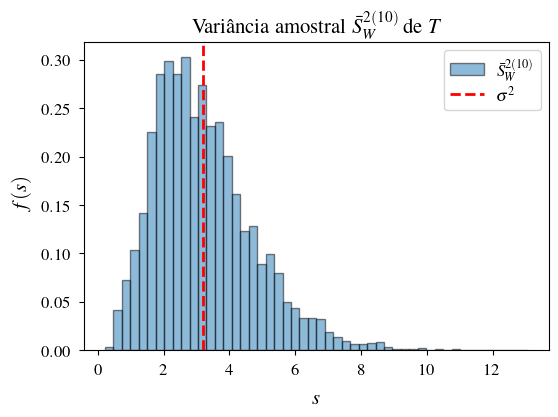

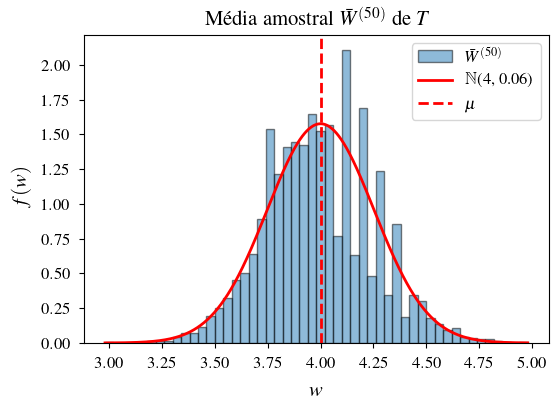

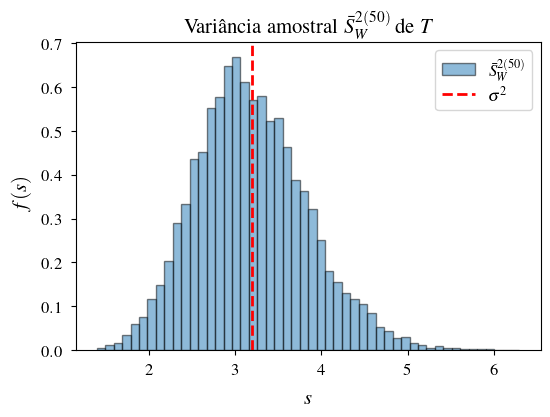

In [60]:
def bootstrap(originalSamples, numSamples=10000, sampleSizes=[5, 10, 50], seed=0):
    """
    Calculate the sample mean and variance.

    Parameters:
        • originalSamples: (list of float). Samples of the original variable structured in a list.
        • numSamples: (int). Number of samples.
        • sampleSize: (list of int). Samples sizes.
        • seed: (int). Random seed.
    
    Returns:
        • meansVarsSample: (dict). Sample mean and variance.
    """
    

    np.random.seed(seed)

    meansVarsSample = {}

    for n in sampleSizes:
        samples = np.random.choice(originalSamples, size=(numSamples, n), replace=True).tolist()
        
        means = []
        vars = []
        for sample in samples:
            mean, var = empericalMoments(sample)
            means.append(mean)
            vars.append(var)

        meansVarsSample[n] = {"W": means, "S²": vars}

    return meansVarsSample

def plotMeanVarHist(meansVarsSample, varName, theoreticalMean, theoreticalVar, bins=50):
    """"
    Plot of the new random variables (sample mean and variance) histograms.

    Parameters:
        • meansVarsSample: (dict). Sample mean and variance.
        • varName: (str). Random variable name.
        • theoreticalMean: theoretical expected values (μ) of the original random variable distribution.
        • theoreticalVar: theoretical variances (σ²) of the original random variable distribution.
    """

    plt.rcParams.update({
        "font.family": "serif",
        "font.serif": ["Times"],
        "text.latex.preamble": r'\usepackage{amsfonts}',
        "text.usetex": True
    })
    px = 1/plt.rcParams["figure.dpi"]
    
    sampleSizes = list(meansVarsSample.keys())

    for n in sampleSizes:
        # W
        samplesW = meansVarsSample[n]["W"]
        x = np.linspace(np.min(samplesW), np.max(samplesW), 1000)
        varTLC = theoreticalVar/n
        sigmaTLC = np.sqrt(varTLC)
        pdfNormal = 1/(sigmaTLC*np.sqrt(2*np.pi))*np.exp(-(1/2)*(((x - theoreticalMean)/(sigmaTLC))**2))

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        ax.hist(samplesW, bins=bins, density=True, alpha=0.5, edgecolor="black", label=fr'$\bar{{W}}^{{({n})}}$')
        ax.plot(x, pdfNormal, "r-", linewidth=2, label=r'$\mathbb{N}$' + f"({theoreticalMean:.0f}, {varTLC:.2f})")
        ax.axvline(theoreticalMean, color="r", linestyle="dashed", linewidth=2, label=r'$\mu$')

        ax.set_xlabel(r'$w$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$f(w)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(fr'Média amostral $\bar{{W}}^{{({n})}}$ de ${varName}$', pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig(f"figures/{varName}_W{n}.pdf", bbox_inches="tight", pad_inches=0)

        # S
        samplesS = meansVarsSample[n]["S²"]

        fig, ax = plt.subplots(1, figsize=(600*px, 400*px))

        ax.hist(samplesS, bins=bins, density=True, alpha=0.5, edgecolor="black", label=fr'$\bar{{S}}^{{2({n})}}_{{W}}$')
        ax.axvline(theoreticalVar, color="r", linestyle="dashed", linewidth=2, label=r'$\sigma^{2}$')

        ax.set_xlabel(r'$s$', labelpad=7.5, fontsize=15)
        ax.set_ylabel(r'$f(s)$', labelpad=7.5, fontsize=15)
        ax.tick_params(pad=6, labelsize=12)
        ax.set_title(fr'Variância amostral $\bar{{S}}^{{2({n})}}_{{W}}$ de ${varName}$', pad=7.5, fontsize=15)
        ax.legend(loc="best", frameon=True, fontsize=12)

        plt.show()
        fig.savefig(f"figures/{varName}_S{n}.pdf", bbox_inches="tight", pad_inches=0)

meansVarsSamples = {"Q": bootstrap(samplesQ),
                    "X": bootstrap(samplesX),
                    "Y": bootstrap(samplesY),
                    "T": bootstrap(samplesT)}

for varName in meansVarsSamples:
    plotMeanVarHist(
        meansVarsSamples[varName],
        varName,
        theoreticalDict["Expected value (μ)"][varName],
        theoreticalDict["Variance (σ²)"][varName]
    )